In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_squared_error

# To Scale our data
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import os
from sklearn.metrics import r2_score

%matplotlib inline
# reading the dataset
housing = pd.read_csv("train.csv")
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## DATA Exploratory Analysis 

In [7]:
## CHeck columns and their data types
housing.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [8]:
# Check null values in the columns 

percent_missing = (housing.isnull().sum() / housing.isnull().count()*100).sort_values(ascending = False)
percent_missing.head(15)


PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
dtype: float64

In [9]:
# Drop columns with more than 30% Null values 
housing.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)

In [10]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [17]:
housing.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 76, dtype: object

In [19]:
percent_missing = (housing.isnull().sum() / housing.isnull().count()*100).sort_values(ascending = False)
print (percent_missing)

LotFrontage     17.739726
GarageType       5.547945
GarageCond       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
                  ...    
BsmtUnfSF        0.000000
TotalBsmtSF      0.000000
MSSubClass       0.000000
HeatingQC        0.000000
SalePrice        0.000000
Length: 76, dtype: float64


In [20]:
#Treaing missing values by imputing for columns with missing values less than or equal to 30%

housing['LotFrontage']= housing.LotFrontage.fillna(housing.LotFrontage.median()) #Can see a presence of outlier so imputing the missing values through median
housing['MasVnrArea']= housing.MasVnrArea.fillna(housing.MasVnrArea.median())    # Can see presence of outlier
housing['GarageYrBlt']= housing.GarageYrBlt.fillna(housing.GarageYrBlt.mean())  # it looks stable with no outlier presence so we can use mean for im

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

<AxesSubplot:xlabel='GarageYrBlt', ylabel='Density'>

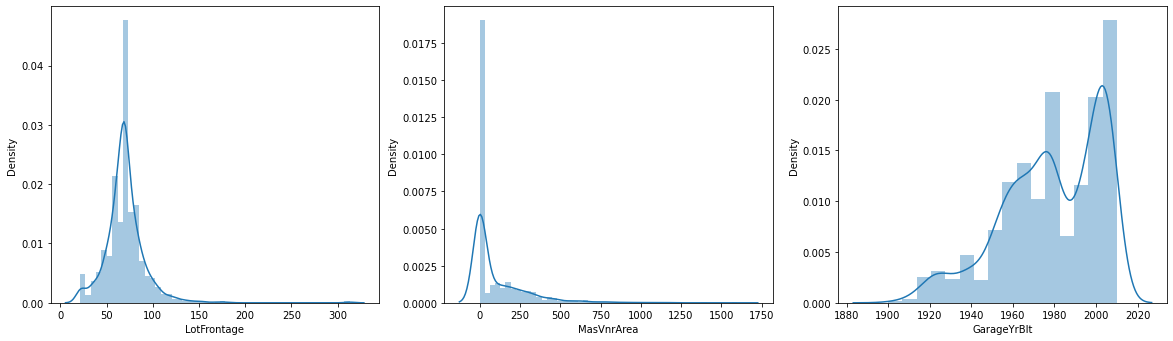

In [21]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.distplot(housing['LotFrontage'])
plt.subplot(2,3,2)
sns.distplot(housing['MasVnrArea'])
plt.subplot(2,3,3)
sns.distplot(housing['GarageYrBlt'])

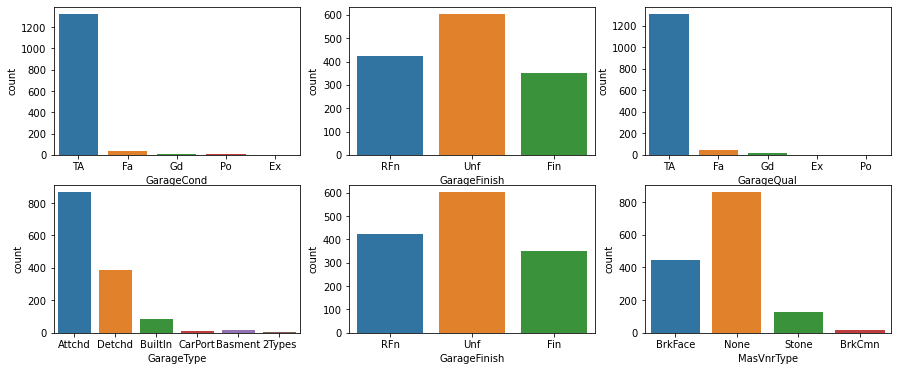

In [23]:
#Here we'll be visualising the variables wih missing values

plt.figure(figsize=(15, 6))
plt.subplot(2,3,1)
sns.countplot(x = 'GarageCond', data = housing)

plt.subplot(2,3,2)
sns.countplot(x = 'GarageFinish',  data = housing)

plt.subplot(2,3,3)
sns.countplot(x = 'GarageQual', data = housing)
plt.subplot(2,3,4)
sns.countplot(x = 'GarageType', data = housing)
plt.subplot(2,3,5)
sns.countplot(x = 'GarageFinish',  data = housing)
plt.subplot(2,3,6)
sns.countplot(x = 'MasVnrType', data = housing)
plt.show()

In [24]:
# The Records where  house doesn't have the garrage so replacing null with No Garrage

housing['GarageType'] = housing['GarageType'].replace(np.nan, 'No Garage')
housing['GarageFinish'] = housing['GarageFinish'].replace(np.nan, 'No Garage')
housing['GarageCond'] = housing['GarageCond'].replace(np.nan, 'No Garage')
housing['GarageQual'] = housing['GarageQual'].replace(np.nan, 'No Garage')
housing['MasVnrType'] = housing['MasVnrType'].replace(np.nan, 'None') 
housing['Electrical'] = housing['Electrical'].replace(np.nan, 'SBrkr') 

In [25]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [26]:
#changing the num to categorical so as to form these as dummy variables 
housing['MSSubClass']=housing['MSSubClass'].replace({20:'1-STORY 1946 & NEWER ALL STYLES',30:'1-STORY 1945 & OLDER',40:'1-STORY W/FINISHED ATTIC ALL AGES',
        45:'1-1/2 STORY - UNFINISHED ALL AGES',
        50:'1-1/2 STORY FINISHED ALL AGES',
        60:'2-STORY 1946 & NEWER',
        70:'2-STORY 1945 & OLDER',
        75:'2-1/2 STORY ALL AGES',
        80:'SPLIT OR MULTI-LEVEL',
        85:'SPLIT FOYER',
        90:'DUPLEX - ALL STYLES AND AGES',
       120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       150:'1-1/2 STORY PUD - ALL AGES',
       160:'2-STORY PUD - 1946 & NEWER',
       180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})

housing['OverallQual']=housing['OverallQual'].replace({ 10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})
housing['OverallCond']=housing['OverallCond'].replace({ 10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})

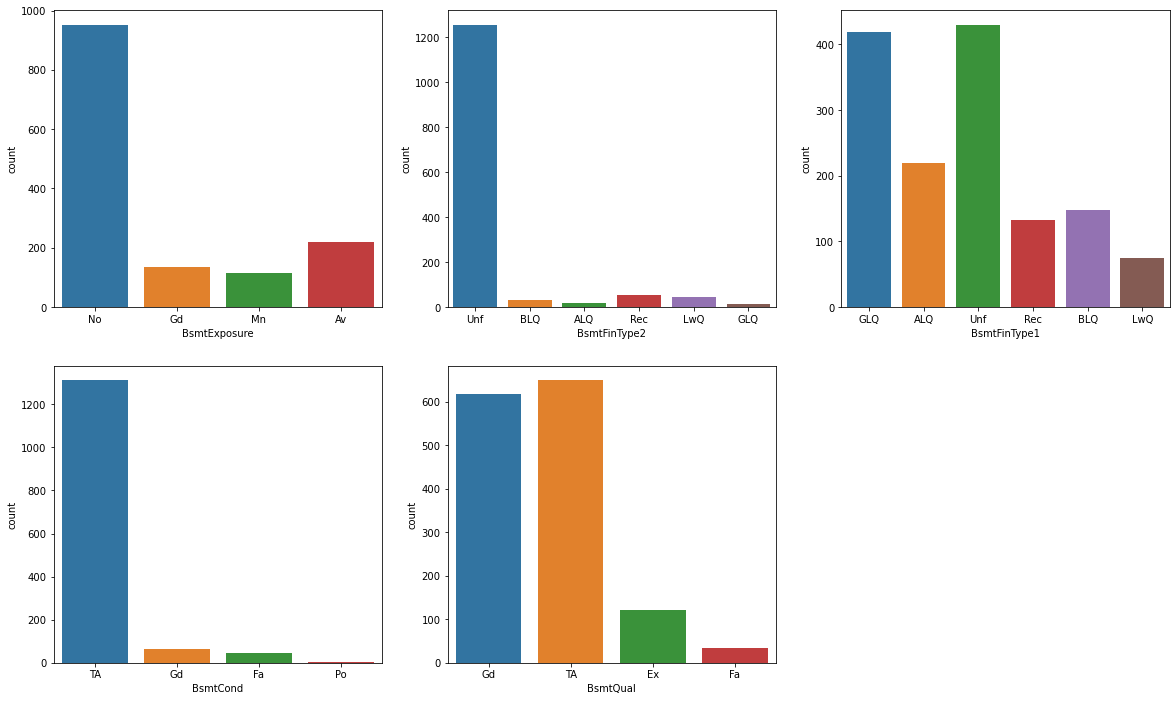

In [27]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'BsmtExposure', data = housing)

plt.subplot(2,3,2)
sns.countplot(x = 'BsmtFinType2',  data = housing)

plt.subplot(2,3,3)
sns.countplot(x = 'BsmtFinType1', data = housing)
plt.subplot(2,3,4)
sns.countplot(x = 'BsmtCond', data = housing)
plt.subplot(2,3,5)
sns.countplot(x = 'BsmtQual',  data = housing)

plt.show()

In [28]:
# The cases when house doesn't have the basement so replacing null with No Basement

housing['BsmtExposure'] = housing['BsmtExposure'].replace(np.nan, 'No Basement')
housing['BsmtFinType2'] = housing['BsmtFinType2'].replace(np.nan, 'No Basement')
housing['BsmtFinType1'] = housing['BsmtFinType1'].replace(np.nan, 'No Basement')
housing['BsmtCond'] = housing['BsmtCond'].replace(np.nan, 'No Basement')
housing['BsmtQual'] = housing['BsmtQual'].replace(np.nan, 'No Basement')

In [30]:
#check missing percentage
percent_missing = (housing.isnull().sum() / housing.isnull().count()*100).sort_values(ascending = False)
percent_missing.head(20)

Id              0.0
FullBath        0.0
Fireplaces      0.0
Functional      0.0
TotRmsAbvGrd    0.0
KitchenQual     0.0
KitchenAbvGr    0.0
BedroomAbvGr    0.0
HalfBath        0.0
BsmtHalfBath    0.0
MSSubClass      0.0
BsmtFullBath    0.0
GrLivArea       0.0
LowQualFinSF    0.0
2ndFlrSF        0.0
1stFlrSF        0.0
Electrical      0.0
CentralAir      0.0
GarageType      0.0
GarageYrBlt     0.0
dtype: float64

In [31]:
## Analyse Dependent variable 
housing['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

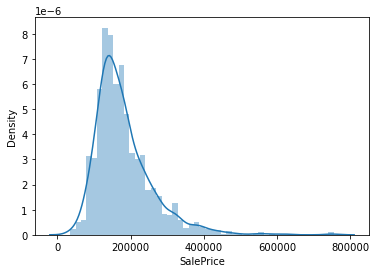

In [32]:
sns.distplot(housing['SalePrice']) 

In [33]:
#skewness and kurtosis
print("Skewness: %f" % housing['SalePrice'].skew())

Skewness: 1.882876


In [34]:
## log trnasformaton
housing['SalePrice']=np.log(housing.SalePrice)

In [35]:
housing['SalePrice'].describe()

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

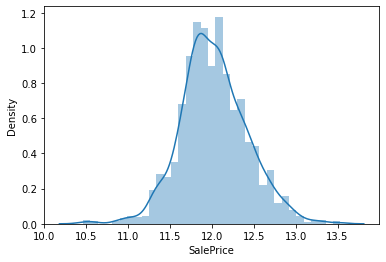

In [36]:
sns.distplot(housing['SalePrice'])

In [37]:
#skewness 
print("Skewness: %f" % housing['SalePrice'].skew())


Skewness: 0.121335


## Categorical variable analysis

In [38]:
Cat = housing.select_dtypes(include=['object'])
Cat.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

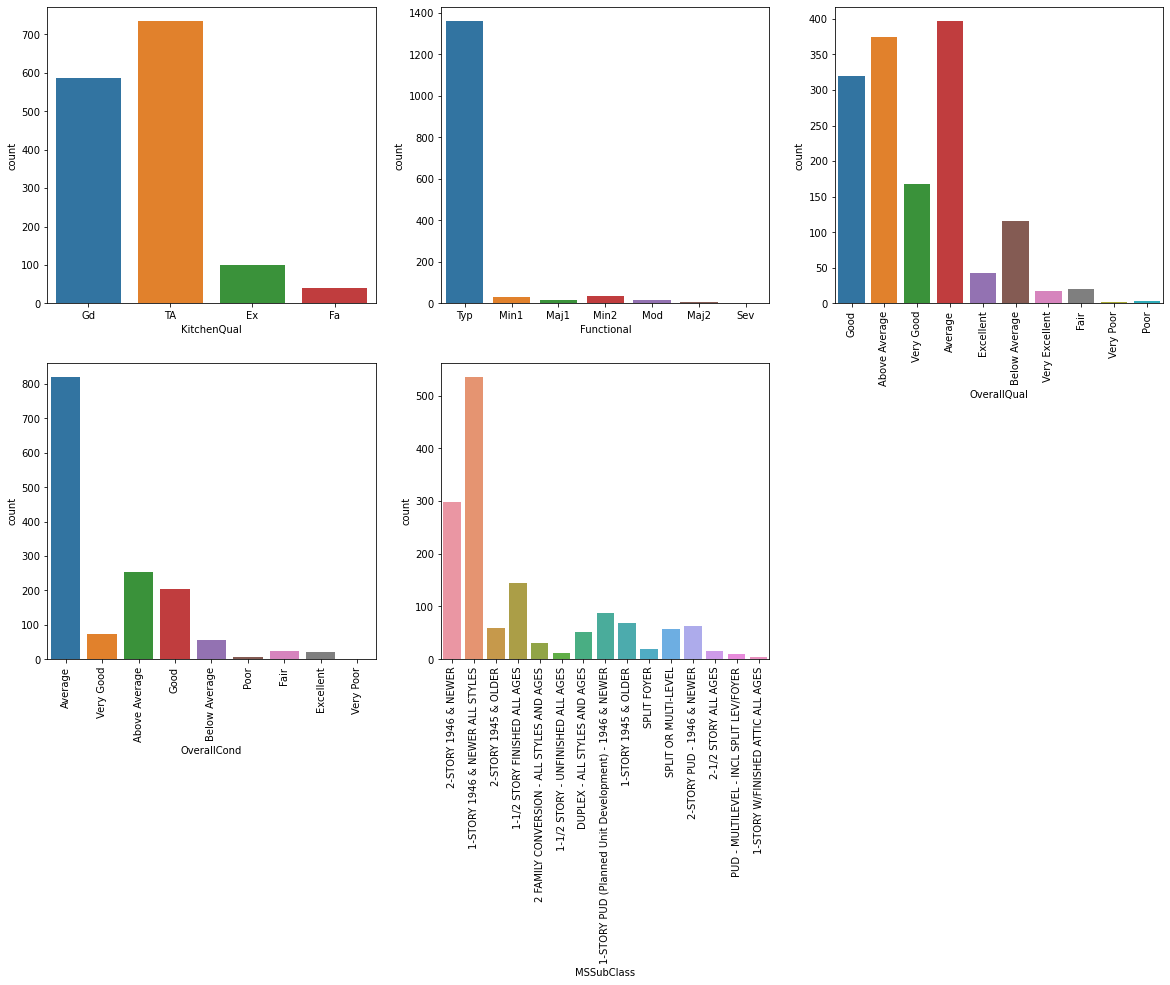

In [39]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'KitchenQual',  data = housing)
plt.subplot(2,3,2)
sns.countplot(x = 'Functional', data = housing)
plt.subplot(2,3,3)
sns.countplot(x = 'OverallQual', data = housing)
plt.xticks(rotation=90)
plt.subplot(2,3,4)
sns.countplot(x = 'OverallCond', data = housing)
plt.xticks(rotation=90)

plt.subplot(2,3,5)
sns.countplot(x = 'MSSubClass',  data = housing)
plt.xticks(rotation=90)


plt.show()

In [40]:
housing['MSSubClass'].value_counts()

1-STORY 1946 & NEWER ALL STYLES                          536
2-STORY 1946 & NEWER                                     299
1-1/2 STORY FINISHED ALL AGES                            144
1-STORY PUD (Planned Unit Development) - 1946 & NEWER     87
1-STORY 1945 & OLDER                                      69
2-STORY PUD - 1946 & NEWER                                63
2-STORY 1945 & OLDER                                      60
SPLIT OR MULTI-LEVEL                                      58
DUPLEX - ALL STYLES AND AGES                              52
2 FAMILY CONVERSION - ALL STYLES AND AGES                 30
SPLIT FOYER                                               20
2-1/2 STORY ALL AGES                                      16
1-1/2 STORY - UNFINISHED ALL AGES                         12
PUD - MULTILEVEL - INCL SPLIT LEV/FOYER                   10
1-STORY W/FINISHED ATTIC ALL AGES                          4
Name: MSSubClass, dtype: int64

In [41]:
# Dropping the highly skewed column 
housing.drop(['Functional'],axis=1,inplace=True)

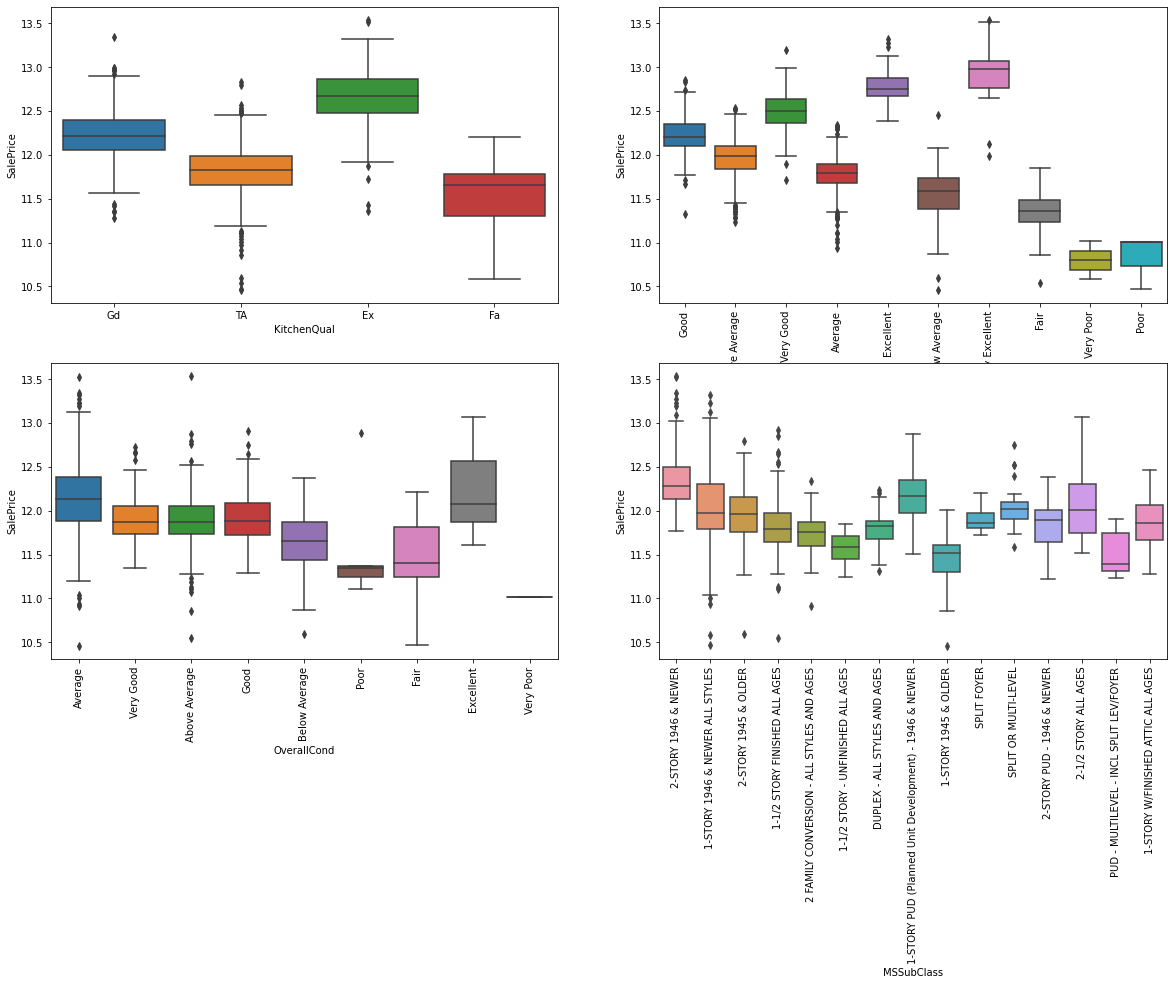

In [42]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x ='KitchenQual', y ='SalePrice', data = housing)
plt.subplot(2,2,2)
sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = housing)
plt.xticks(rotation=90)

plt.subplot(2,2,3)
sns.boxplot(x = 'OverallCond', y = 'SalePrice', data = housing)
plt.xticks(rotation=90)

plt.subplot(2,2,4)
sns.boxplot(x = 'MSSubClass', y = 'SalePrice', data = housing)
plt.xticks(rotation=90)

plt.show()

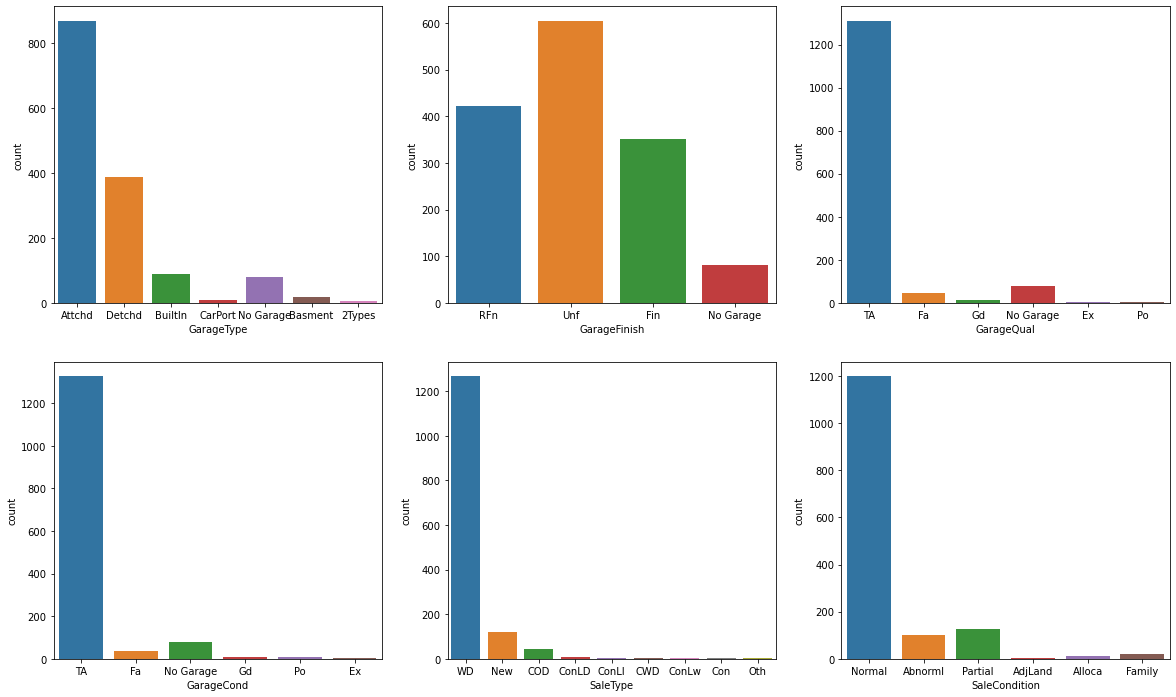

In [43]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'GarageType',  data = housing)
plt.subplot(2,3,2)
sns.countplot(x = 'GarageFinish', data = housing)
plt.subplot(2,3,3)
sns.countplot(x = 'GarageQual', data = housing)
plt.subplot(2,3,4)
sns.countplot(x = 'GarageCond', data = housing)
plt.subplot(2,3,5)
sns.countplot(x = 'SaleType',  data = housing)
plt.subplot(2,3,6)
sns.countplot(x = 'SaleCondition', data = housing)
plt.show()

### Except "GrargeFinish" remaning columns are skewed 

In [44]:
housing.drop(['GarageQual','GarageCond','SaleType'],axis=1,inplace=True)

In [45]:
housing['GarageType'] = housing['GarageType'].replace(['Basment','CarPort','2Types'],'Others')
housing['SaleCondition'] = housing['SaleCondition'].replace(['Family','Alloca','AdjLand'],'Others')

<AxesSubplot:xlabel='GarageFinish', ylabel='SalePrice'>

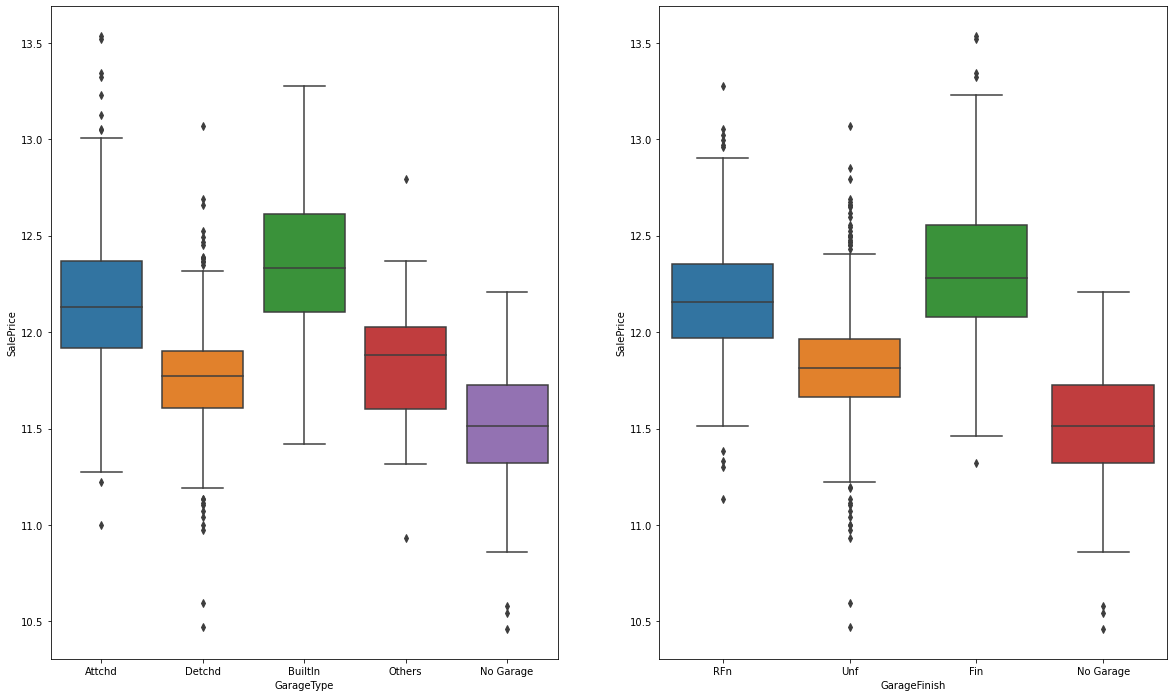

In [46]:
#Let's see effect of Garage type and GarageFinish on SalePrice

plt.figure(figsize=(20, 12))
plt.subplot(1,2,1)
sns.boxplot(x = 'GarageType', y ='SalePrice', data = housing)
plt.subplot(1,2,2)
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = housing)

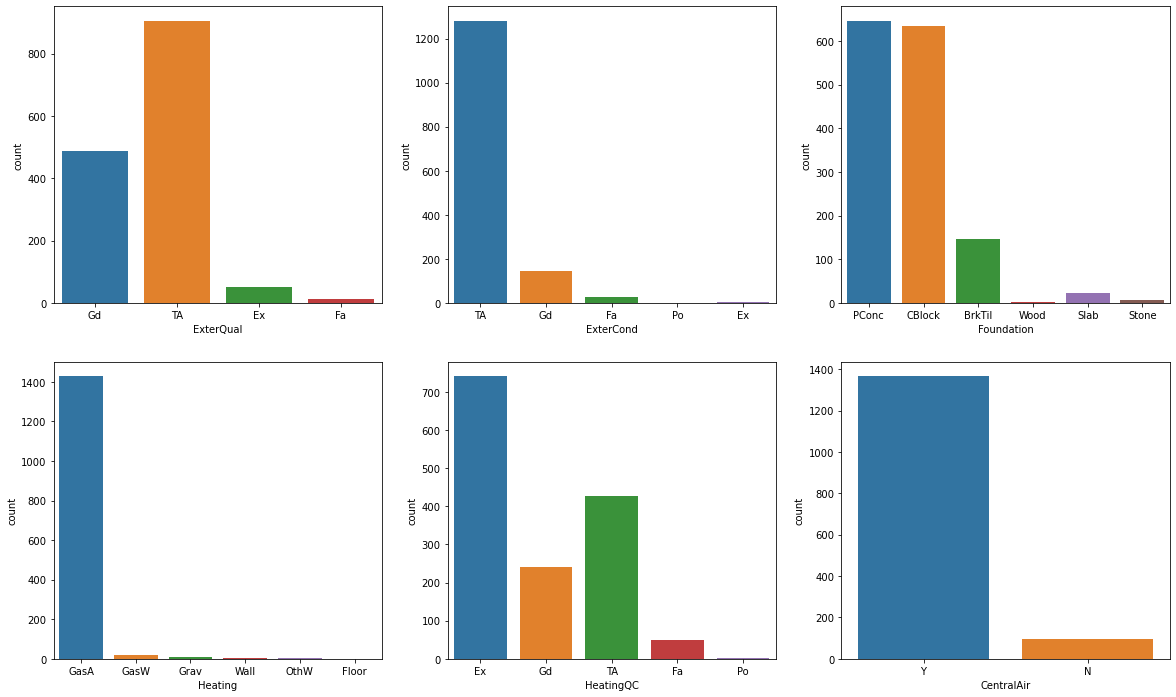

In [47]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'ExterQual',  data = housing)
plt.subplot(2,3,2)
sns.countplot(x = 'ExterCond', data = housing)
plt.subplot(2,3,3)
sns.countplot(x = 'Foundation', data = housing)
plt.subplot(2,3,4)
sns.countplot(x = 'Heating', data = housing)
plt.subplot(2,3,5)
sns.countplot(x = 'HeatingQC',  data = housing)
plt.subplot(2,3,6)
sns.countplot(x = 'CentralAir', data = housing)
plt.show()

In [48]:
## variables like Heating , Central Airand Exter Cond are skewed so we will drop them 

housing.drop(['CentralAir','Heating','ExterCond'],axis=1,inplace=True)

In [49]:
housing['Foundation'] = housing['Foundation'].replace(['Slab','Stone','Wood'],'Others')

<AxesSubplot:xlabel='HeatingQC', ylabel='SalePrice'>

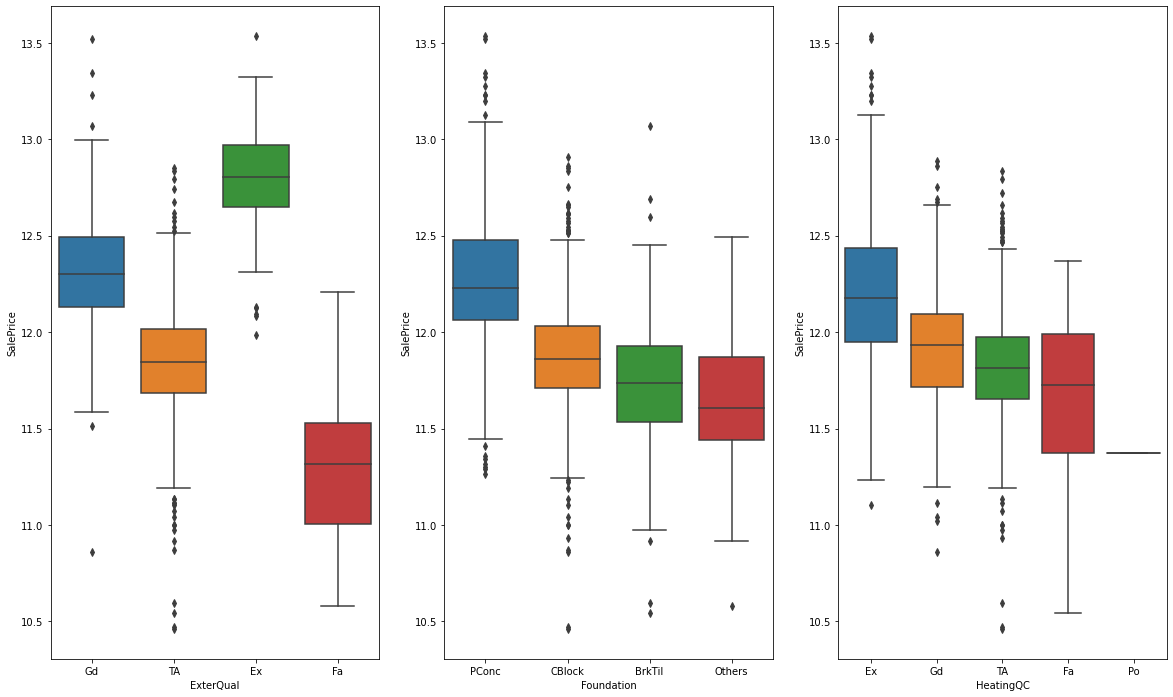

In [50]:
#Let's see effect of Garage type and GarageFinish on SalePrice

plt.figure(figsize=(20, 12))
plt.subplot(1,3,1)
sns.boxplot(x = 'ExterQual', y ='SalePrice', data = housing)
plt.subplot(1,3,2)
sns.boxplot(x = 'Foundation', y = 'SalePrice', data = housing)
plt.subplot(1,3,3)
sns.boxplot(x = 'HeatingQC', y = 'SalePrice', data = housing)

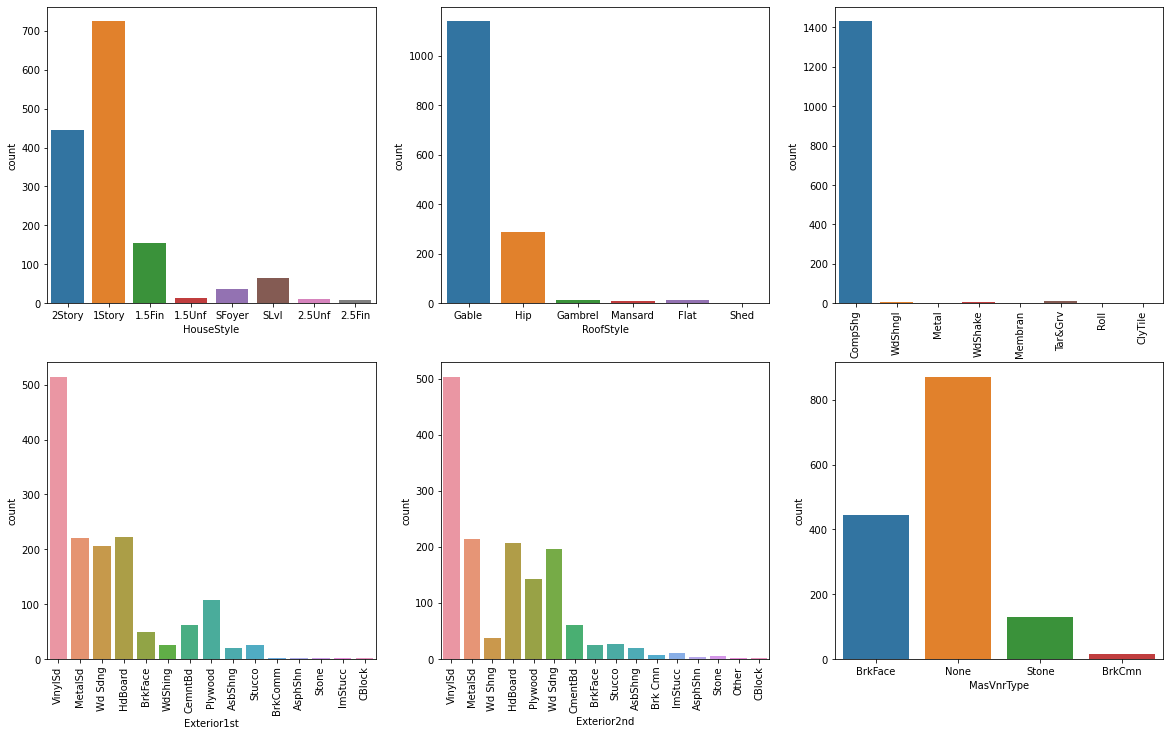

In [51]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'HouseStyle',  data = housing)
plt.subplot(2,3,2)
sns.countplot(x = 'RoofStyle', data = housing)
plt.subplot(2,3,3)
sns.countplot(x = 'RoofMatl', data = housing)
plt.xticks(rotation=90)
plt.subplot(2,3,4)
sns.countplot(x = 'Exterior1st', data = housing)
plt.xticks(rotation=90)
plt.subplot(2,3,5)
sns.countplot(x = 'Exterior2nd',  data = housing)
plt.xticks(rotation=90)
plt.subplot(2,3,6)
sns.countplot(x = 'MasVnrType', data = housing)
plt.show()

In [52]:
housing['Exterior2nd'].value_counts() #Checking the skewness for other columns


VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [53]:
housing['HouseStyle'] = housing['HouseStyle'].replace(['SFoyer','1.5Unf','2.5Unf','2.5Fin'],'Others')
housing['RoofStyle'] = housing['RoofStyle'].replace(['Shed','Mansard','Gambrel','Flat'],'Others')
housing['Exterior1st'] = housing['Exterior1st'].replace(['AsphShn','ImStucc','CBlock','Stone','BrkComm','AsbShng','Stucco','WdShing'],'Others')
housing['Exterior2nd'] = housing['Exterior2nd'].replace(['Other','AsphShn','ImStucc','CBlock','Stone','BrkComm','AsbShng','Stucco','BrkFace'],'Others')

In [54]:
# Dropping highly skewed column 
housing.drop(['RoofMatl'],axis=1,inplace=True)

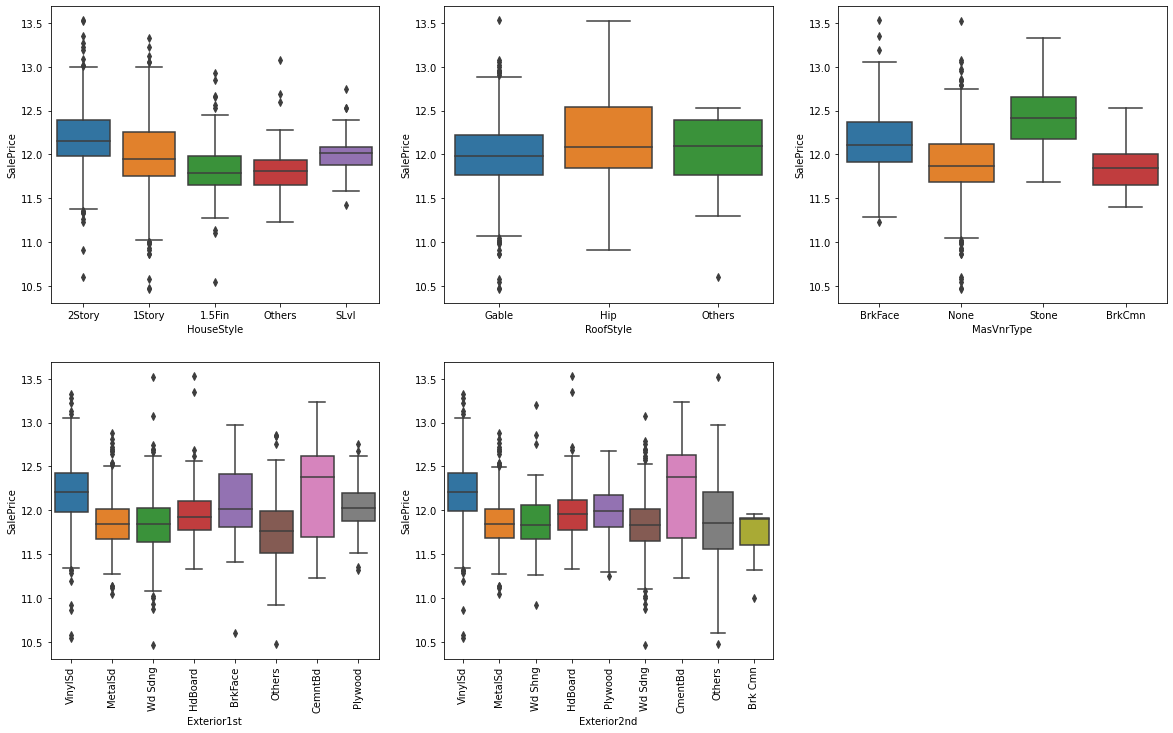

In [55]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'HouseStyle', y ='SalePrice', data = housing)
plt.subplot(2,3,2)
sns.boxplot(x = 'RoofStyle', y = 'SalePrice', data = housing)
plt.subplot(2,3,3)
sns.boxplot(x = 'MasVnrType', y = 'SalePrice', data = housing)
plt.subplot(2,3,4)
sns.boxplot(x = 'Exterior1st', y = 'SalePrice', data = housing)
plt.xticks(rotation=90)
plt.subplot(2,3,5)
sns.boxplot(x = 'Exterior2nd', y = 'SalePrice', data = housing)
plt.xticks(rotation=90)
plt.show()plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'Utilities',  data = housing)
plt.subplot(2,3,2)
sns.countplot(x = 'Street', data = housing)
plt.subplot(2,3,3)
sns.countplot(x = 'Neighborhood', data = housing)
plt.xticks(rotation=90)
plt.subplot(2,3,4)
sns.countplot(x = 'Condition1', data = housing)
plt.subplot(2,3,5)
sns.countplot(x = 'Condition2',  data = housing)
plt.subplot(2,3,6)
sns.countplot(x = 'BldgType', data = housing)
plt.show()

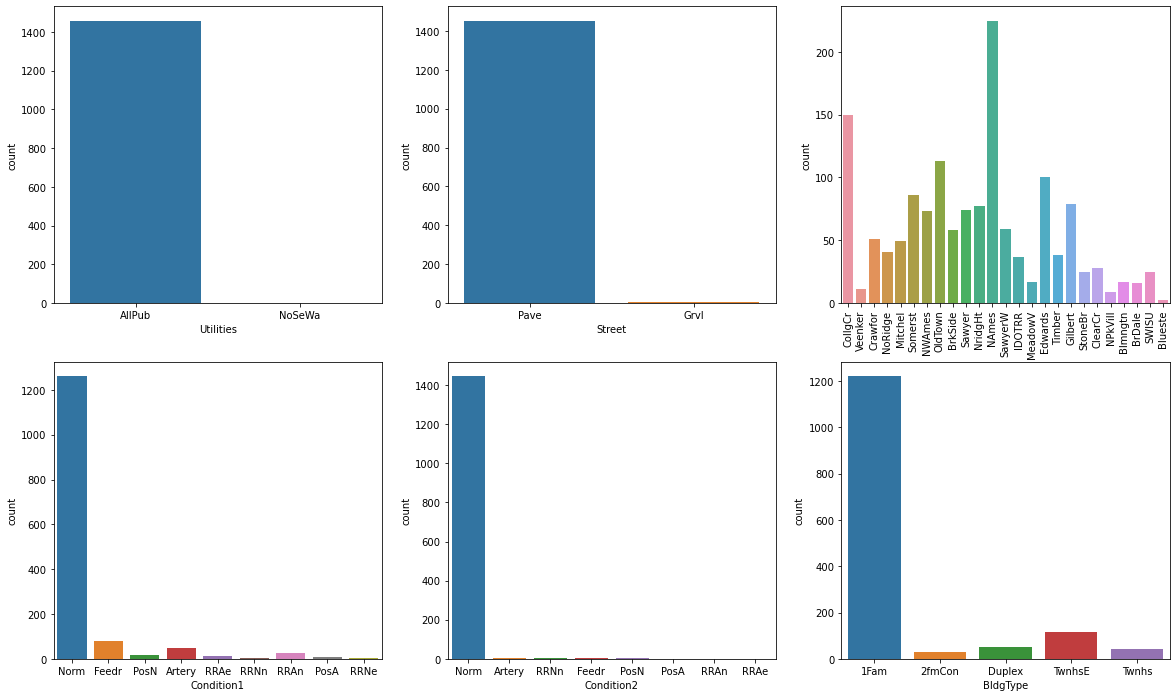

In [56]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'Utilities',  data = housing)
plt.subplot(2,3,2)
sns.countplot(x = 'Street', data = housing)
plt.subplot(2,3,3)
sns.countplot(x = 'Neighborhood', data = housing)
plt.xticks(rotation=90)
plt.subplot(2,3,4)
sns.countplot(x = 'Condition1', data = housing)
plt.subplot(2,3,5)
sns.countplot(x = 'Condition2',  data = housing)
plt.subplot(2,3,6)
sns.countplot(x = 'BldgType', data = housing)
plt.show()

In [58]:
# Dropping highly skewed column 
housing.drop(['Utilities','Street','Condition1','Condition2'],axis=1,inplace=True)

SyntaxError: invalid syntax (2971347608.py, line 8)

<AxesSubplot:xlabel='BldgType', ylabel='SalePrice'>

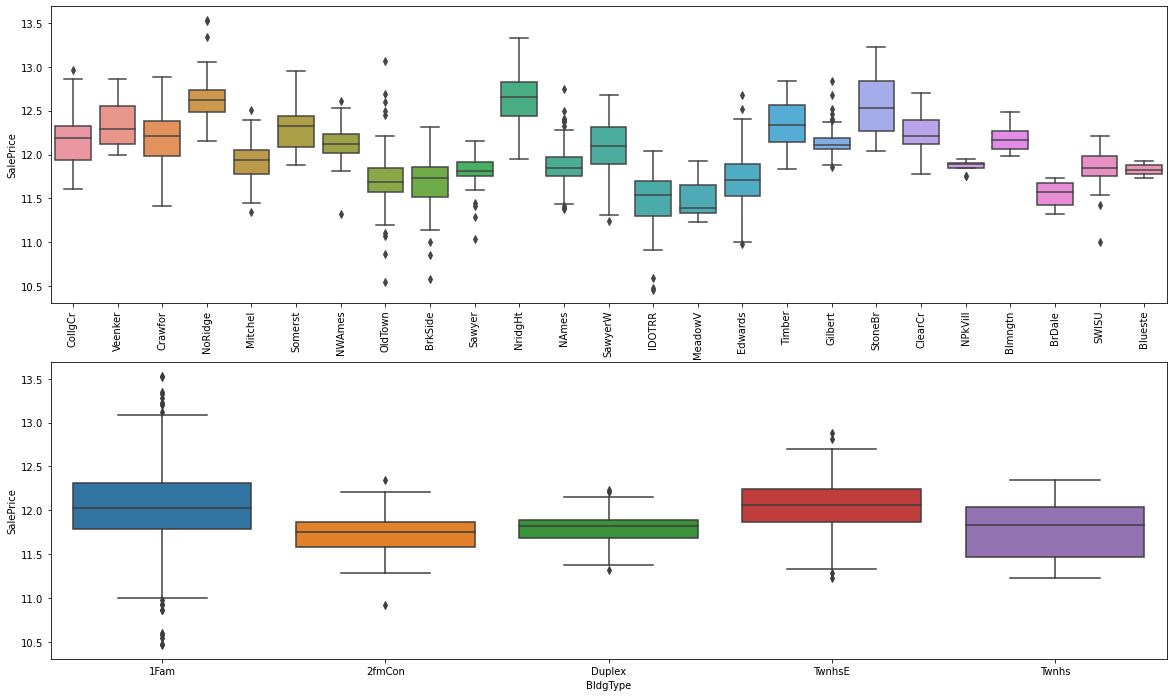

In [59]:
plt.figure(figsize=(20, 12))
plt.subplot(2,1,1)
sns.boxplot(x = 'Neighborhood', y ='SalePrice', data = housing)
plt.xticks(rotation=90)
plt.subplot(2,1,2)
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = housing)


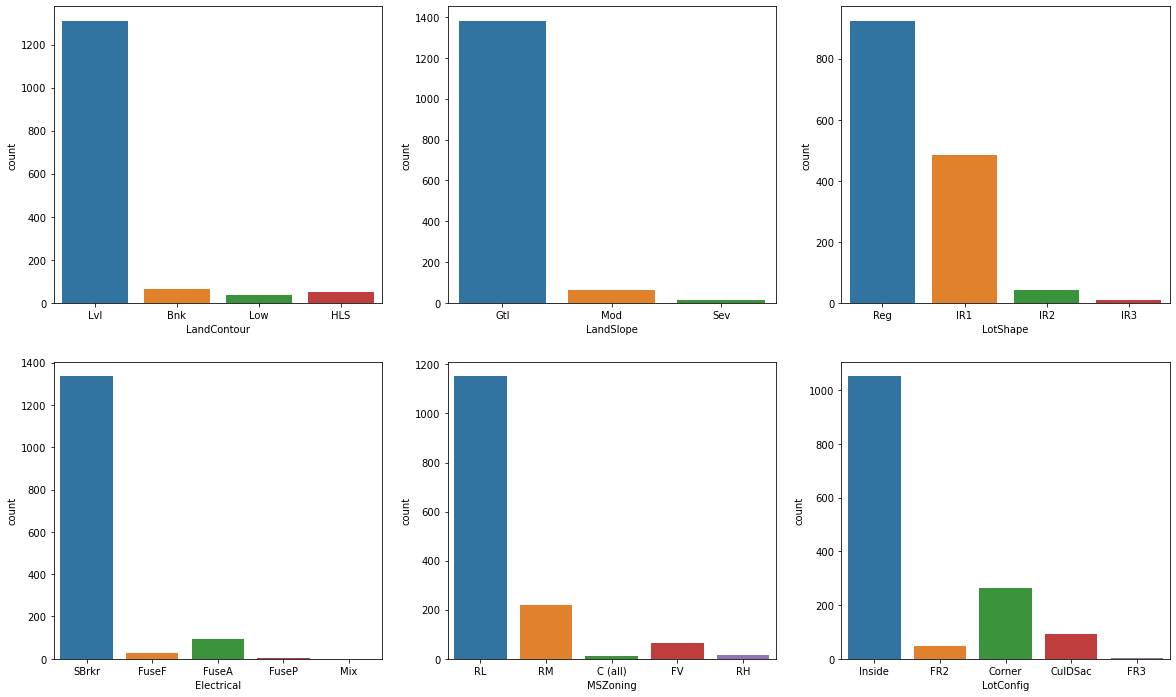

In [60]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'LandContour',  data = housing)
plt.subplot(2,3,2)
sns.countplot(x = 'LandSlope', data = housing)
plt.subplot(2,3,3)
sns.countplot(x = 'LotShape', data = housing)
plt.subplot(2,3,4)
sns.countplot(x = 'Electrical', data = housing)
plt.subplot(2,3,5)
sns.countplot(x = 'MSZoning',  data = housing)
plt.subplot(2,3,6)
sns.countplot(x = 'LotConfig', data = housing)
plt.show()

In [61]:
## drop skewed columns 
housing.drop(['LandSlope','LandContour','Electrical'],axis=1,inplace=True)

In [62]:
housing['MSZoning'] = housing['MSZoning'].replace(['RH','C (all)'],'Others')

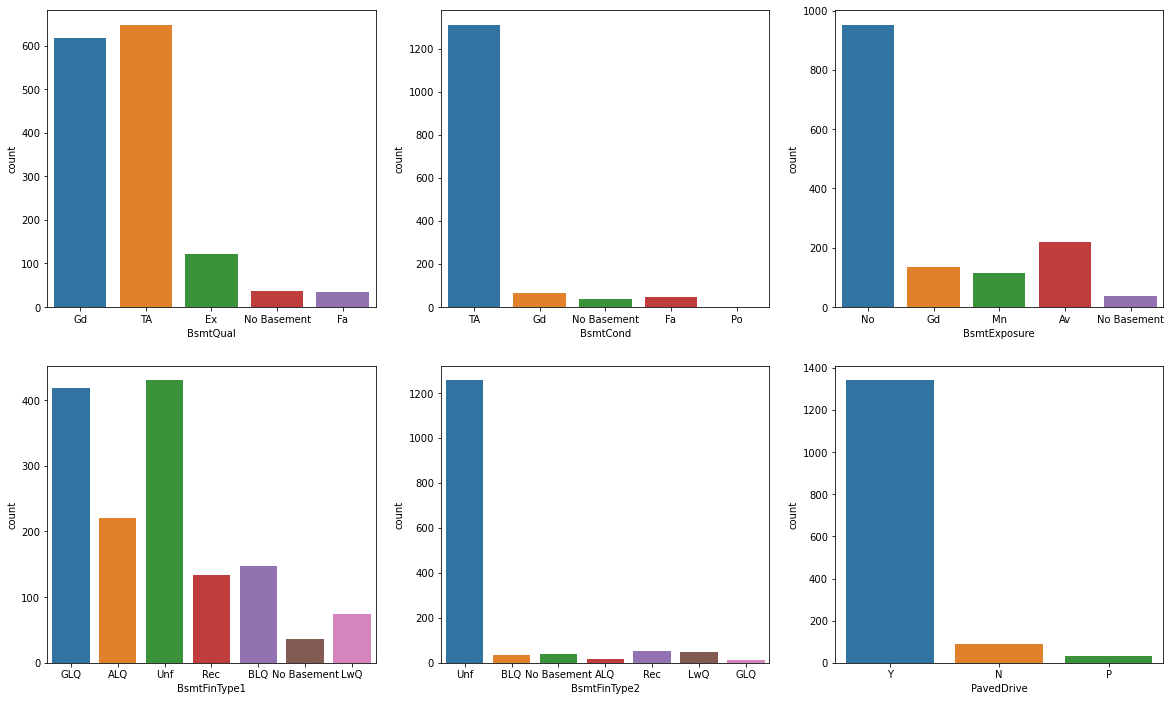

In [65]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'BsmtQual',  data = housing)
plt.subplot(2,3,2)
sns.countplot(x = 'BsmtCond', data = housing)
plt.subplot(2,3,3)
sns.countplot(x = 'BsmtExposure', data = housing)
plt.subplot(2,3,4)
sns.countplot(x = 'BsmtFinType1', data = housing)
plt.subplot(2,3,5)
sns.countplot(x = 'BsmtFinType2',  data = housing)
plt.subplot(2,3,6)
sns.countplot(x = 'PavedDrive', data = housing)
plt.show()

In [66]:
housing.drop(['BsmtFinType2','PavedDrive','BsmtCond'],axis=1,inplace=True)

In [67]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,1,2-STORY 1946 & NEWER,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,61,0,0,0,0,0,2,2008,Normal,12.247694
1,2,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,0,0,0,5,2007,Normal,12.109011
2,3,2-STORY 1946 & NEWER,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,42,0,0,0,0,0,9,2008,Normal,12.317167
3,4,2-STORY 1945 & OLDER,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,35,272,0,0,0,0,2,2006,Abnorml,11.849398
4,5,2-STORY 1946 & NEWER,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,84,0,0,0,0,0,12,2008,Normal,12.429216


In [68]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 58 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   LotShape       1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   Neighborhood   1460 non-null   object 
 8   BldgType       1460 non-null   object 
 9   HouseStyle     1460 non-null   object 
 10  OverallQual    1460 non-null   object 
 11  OverallCond    1460 non-null   object 
 12  YearBuilt      1460 non-null   int64  
 13  YearRemodAdd   1460 non-null   int64  
 14  RoofStyle      1460 non-null   object 
 15  Exterior1st    1460 non-null   object 
 16  Exterior2nd    1460 non-null   object 
 17  MasVnrType     1460 non-null   object 
 18  MasVnrAr

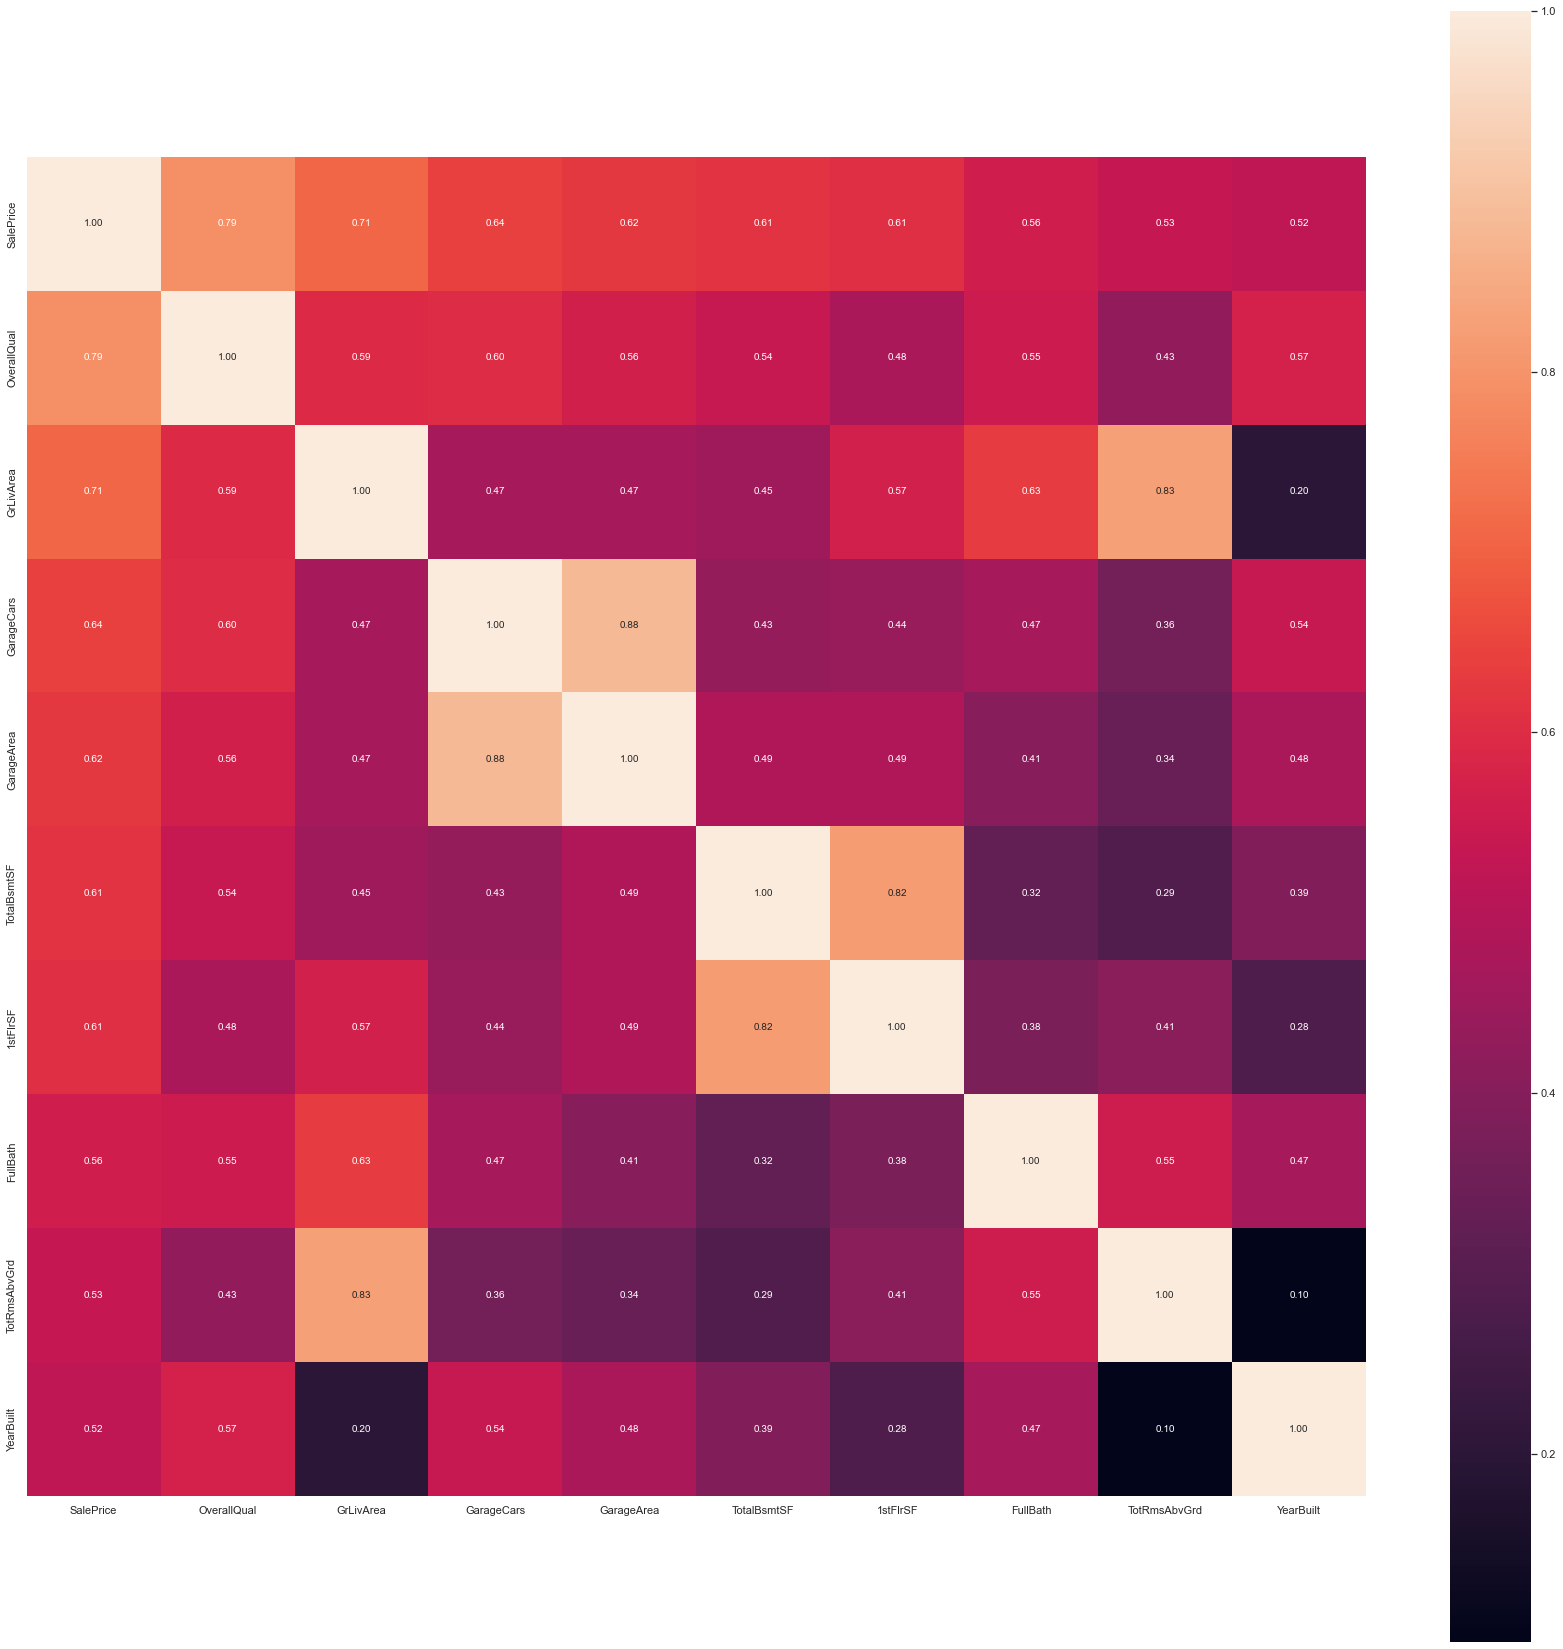

In [159]:
#Now the saleprice correlation matrix
corrmat = housing.corr()
k = 10 #number of variables for heatmap
plt.subplots(figsize=(30,30))
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(housing[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [72]:
# Feature engineering 
housing['YearSinceRemodel'] = 2010 - ((housing['YearRemodAdd'] - housing['YearBuilt']) + housing['YearBuilt']) 

## Dummy variable 

In [73]:
Cat1 = housing.select_dtypes(include=['object']) #checking all the categorical columns to form a dummy variables
Cat1.columns

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual',
       'GarageType', 'GarageFinish', 'SaleCondition'],
      dtype='object')

In [74]:
Num = housing.select_dtypes(include=['int64','float64']) #all the numerical variables
Num.columns

Index(['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice',
       'YearSinceRemodel'],
      dtype='object')

In [75]:
Num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                1460 non-null   int64  
 1   LotFrontage       1460 non-null   float64
 2   LotArea           1460 non-null   int64  
 3   YearBuilt         1460 non-null   int64  
 4   YearRemodAdd      1460 non-null   int64  
 5   MasVnrArea        1460 non-null   float64
 6   BsmtFinSF1        1460 non-null   int64  
 7   BsmtFinSF2        1460 non-null   int64  
 8   BsmtUnfSF         1460 non-null   int64  
 9   TotalBsmtSF       1460 non-null   int64  
 10  1stFlrSF          1460 non-null   int64  
 11  2ndFlrSF          1460 non-null   int64  
 12  LowQualFinSF      1460 non-null   int64  
 13  GrLivArea         1460 non-null   int64  
 14  BsmtFullBath      1460 non-null   int64  
 15  BsmtHalfBath      1460 non-null   int64  
 16  FullBath          1460 non-null   int64  


In [76]:
Cat1 = pd.get_dummies(Cat1,drop_first=True)  # Dummy variables
print(Cat1.shape)

(1460, 130)


In [77]:

Cat1.head()

,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,...,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0


In [78]:
# concat the dummy variables with themain dataset
housing = pd.concat([housing, Cat1], axis=1) 


In [79]:
## Remove columns

housing.drop(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish',
       'SaleCondition','Id','OverallCond','MSSubClass','OverallQual'],axis=1,inplace=True)


In [80]:
housing.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,0,0,0,0,0,1,0,1,0,0
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,0,0,0,0,0,1,0,1,0,0
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,0,0,0,0,0,1,0,1,0,0
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,0,1,0,0,0,0,1,0,0,0
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,0,0,0,0,0,1,0,1,0,0


In [81]:
## Not required for model building
housing.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis=1,inplace=True)

In [82]:
# Putting feature variable to X
X = housing.drop(['SalePrice'], axis=1)
X.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,0,0,0,0,0,1,0,1,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,0,0,0,0,0,1,0,1,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,0,0,0,0,0,1,0,1,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,0,1,0,0,0,0,1,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,0,0,0,0,0,1,0,1,0,0


In [83]:
# Putting response variable to y
y = housing['SalePrice']
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [84]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=100)

In [85]:
scaler = StandardScaler()

In [88]:
X_train[['LotFrontage', 'LotArea','MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces','GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal']] = scaler.fit_transform(X_train[['LotFrontage', 'LotArea','MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces','GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal']])

In [89]:
X_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
210,-0.115302,-0.473765,-0.558025,0.043512,-0.293313,-0.374367,-0.430911,-0.765065,-0.787597,-0.124502,...,0,0,1,0,1,0,0,1,0,0
318,0.926898,-0.056845,0.809137,1.160345,-0.293313,-0.454644,0.621579,0.511914,2.140556,-0.124502,...,0,0,0,0,0,1,0,1,0,0
239,-0.794998,-0.169324,-0.558025,-0.761296,-0.293313,0.171964,-0.712011,-0.930972,0.795996,-0.124502,...,0,1,0,0,0,0,1,1,0,0
986,-0.477806,-0.502297,-0.558025,-0.963574,-0.293313,-0.175904,-1.256778,-0.420683,0.669584,-0.124502,...,0,0,0,0,0,0,1,1,0,0
1416,-0.432493,0.082905,-0.558025,-0.963574,-0.293313,0.475233,-0.620490,0.195183,1.611926,-0.124502,...,0,1,0,0,0,0,1,1,0,0


In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=100)

# Model Building and Evaluation 

## Ridge regression model 

In [127]:
# alpha values to tune 
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000]}
ridge = Ridge()
# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [128]:
print(model_cv.best_params_)

{'alpha': 2.0}


In [129]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.053670,0.072581,0.010095,0.004399,0.0001,{'alpha': 0.0001},0.868247,0.777081,0.838201,0.890476,...,0.853288,0.042836,19,0.924369,0.935767,0.931027,0.919954,0.918905,0.926004,0.006484
1,0.014886,0.002107,0.006696,0.000860,0.001,{'alpha': 0.001},0.868258,0.777072,0.838200,0.890516,...,0.853309,0.042858,18,0.924369,0.935767,0.931027,0.919954,0.918905,0.926004,0.006484
2,0.014453,0.001436,0.006069,0.000539,0.01,{'alpha': 0.01},0.868367,0.776981,0.838188,0.890866,...,0.853502,0.043071,17,0.924368,0.935766,0.931026,0.919953,0.918902,0.926003,0.006484
3,0.015093,0.001268,0.007027,0.000539,0.1,{'alpha': 0.1},0.869382,0.776055,0.838034,0.892791,...,0.854768,0.044649,15,0.924329,0.935711,0.930967,0.919904,0.918744,0.925931,0.006505
4,0.016558,0.000995,0.006159,0.000449,0.2,{'alpha': 0.2},0.870383,0.775061,0.837833,0.894085,...,0.855581,0.045873,13,0.924237,0.935601,0.930848,0.919804,0.918451,0.925788,0.006541


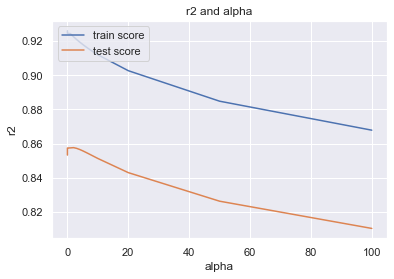

In [139]:
# plotting mean test & train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting the graph
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2')
plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [135]:
#optimum alpha
alpha = 2.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_

array([-5.33404067e-04,  1.54573387e-06, -1.22906366e-05, -7.26266241e-06,
        4.19177231e-06,  2.02982518e-05,  1.72274259e-05,  6.97280595e-05,
        1.01194586e-04, -5.93817614e-05,  1.11541043e-04,  4.53619094e-02,
        1.81828679e-02,  5.54210530e-02,  4.01581630e-02,  8.12672995e-03,
       -1.08367122e-01,  9.10630817e-03,  3.29317903e-02,  5.08063888e-02,
        1.61935751e-05,  9.46443677e-05, -5.57737102e-05,  1.48263618e-04,
        1.98325159e-04,  2.19469045e-04, -3.20413689e-04, -2.54176525e-06,
        5.08553888e-04, -1.23147274e-03,  2.10434061e-02, -9.66153539e-02,
        4.41276848e-02, -1.58702937e-03, -1.47870083e-02,  1.35216381e-04,
        4.23677455e-02,  2.03225504e-02, -2.79667219e-03, -4.72390629e-02,
        3.13239797e-02, -4.12645713e-02,  3.79380196e-02,  7.64596960e-03,
       -9.85784195e-02, -8.54772180e-03, -2.66001210e-02,  2.79738419e-02,
       -5.50081690e-02,  1.07722810e-02,  3.58728692e-02, -4.87037487e-02,
       -4.62234681e-02, -

In [136]:
#printing R2 , RSS, MSE for test train sets
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

In [140]:
metric2=[]
r2_train_lr = r2_score(y_train,y_pred_train )
print("r2_train:")
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test:")
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train-y_pred_train))
print("RSS_train:")
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS_test:")
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print("MSE_train:")
print(mse_train_lr)
metric2.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test , y_pred_test)
print("MSE_test:")
print(mse_test_lr)
metric2.append(mse_test_lr)

r2_train:
0.9178909378208737
r2_test:
0.880020460310285
RSS_train:
13.177867502228334
RSS_test:
8.646753979386947
MSE_train:
0.01290682419415116
MSE_test:
0.01974144744152271


###  From the above stats we can observe that the Ridge regression showing good values, but Ridge regression consider all variables /predictor.

In [149]:
# Ridge model parameters
model_parameters = list(sorted(ridge.coef_))
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

#getting top 10 parameters from ridge
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]

ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(11)



,Feaure,Coef
0,constant,11.637765
89,OverallQual_Excellent,0.201510
70,Neighborhood_NridgHt,0.137584
94,OverallQual_Very Good,0.128839
69,Neighborhood_NoRidge,0.126702
60,Neighborhood_Crawfor,0.117898
75,Neighborhood_Somerst,0.117572
76,Neighborhood_StoneBr,0.108143
93,OverallQual_Very Excellent,0.093665
58,Neighborhood_ClearCr,0.073125


## Lasso Regression

In [150]:
params = {'alpha': [0.00006,0.0006, 0.0008, 0.001, 0.002, 0.004, 0.006, 0.008 ]}
lasso = Lasso()

# cross validation system
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.420e-01, tolerance: 1.304e-02
  model = cd_fast.enet_coordinate_descent(
C:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.038e-01, tolerance: 1.281e-02
  model = cd_fast.enet_coordinate_descent(
C:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.756e-01, tolerance: 1.314e-02
  model = cd_fast.enet_coo

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [6e-05, 0.0006, 0.0008, 0.001, 0.002, 0.004,
                                   0.006, 0.008]},
             return_train_score=True, scoring='r2', verbose=1)

In [151]:
print(model_cv.best_params_)

{'alpha': 6e-05}


In [152]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.158861,0.060213,0.005499,0.002960,0.00006,{'alpha': 6e-05},0.872325,0.773018,0.839580,0.895919,...,0.856191,0.046822,1,0.923862,0.935108,0.930417,0.919443,0.917980,0.925362,0.006517
1,0.045337,0.013933,0.005404,0.000480,0.0006,{'alpha': 0.0006},0.884401,0.724748,0.835348,0.898012,...,0.850393,0.067713,2,0.911534,0.923960,0.918723,0.907989,0.903086,0.913058,0.007462
2,0.036357,0.013733,0.004428,0.001975,0.0008,{'alpha': 0.0008},0.883902,0.709901,0.832624,0.895453,...,0.845629,0.072409,3,0.906265,0.920044,0.913821,0.903300,0.897012,0.908088,0.008059
3,0.048249,0.006551,0.007358,0.000692,0.001,{'alpha': 0.001},0.883078,0.699448,0.827873,0.892849,...,0.841339,0.075588,4,0.901000,0.916719,0.909043,0.898351,0.892075,0.903438,0.008588
4,0.032197,0.002160,0.006209,0.000694,0.002,{'alpha': 0.002},0.877497,0.652922,0.806379,0.884122,...,0.821178,0.089143,5,0.881651,0.901967,0.888512,0.880169,0.871710,0.884802,0.010111


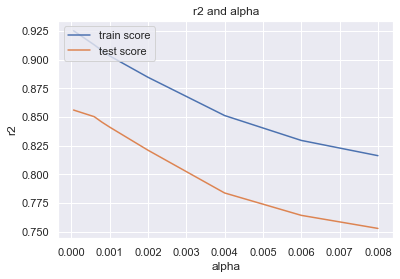

In [153]:
# plotting the mean test and training scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2')

plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [154]:
#optimum alpha
alpha =6e-05
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

C:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.401e-01, tolerance: 1.605e-02
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=6e-05)

In [147]:
lasso.coef_

array([-5.46468374e-04,  1.50026158e-06, -1.96421426e-05, -1.31440774e-05,
       -2.17650672e-06,  2.12191914e-05,  1.08289356e-05,  1.54025770e-04,
        1.85820126e-04,  1.73413776e-05,  2.26487346e-05,  4.62777669e-02,
        1.81415871e-02,  5.44104281e-02,  4.03169160e-02,  5.65241971e-03,
       -1.16943329e-01,  1.02465663e-02,  3.03295807e-02,  4.81882288e-02,
        1.80119788e-05,  9.45226617e-05, -5.60714302e-05,  1.47256316e-04,
        2.00940416e-04,  2.15560887e-04, -2.97661690e-04, -2.43905998e-06,
        4.06137203e-04, -1.18174243e-03,  8.50681978e-03, -1.06293389e-01,
        3.28155123e-02, -0.00000000e+00, -1.74958377e-02, -3.71100898e-04,
        3.75003592e-02,  1.31963015e-03, -1.52905926e-02, -4.37218600e-02,
        3.17087958e-02, -1.30541359e-02,  3.35933027e-02,  0.00000000e+00,
       -8.68104596e-02, -0.00000000e+00, -8.82274122e-03,  2.73447276e-02,
       -4.79185987e-02,  1.15502779e-02,  3.38075215e-02, -5.01911834e-02,
       -6.06185595e-02, -

In [165]:
lasso.score(X_train,y_train)

0.9198937549419117

In [164]:
lasso.score(X_test,y_test)

0.8784196228309278

In [160]:
#printing R2 , RSS, MSE for test train sets
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

In [162]:
metric2=[]
r2_train_lr = r2_score(y_train,y_pred_train )
print("r2_train:")
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test:")
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train-y_pred_train))
print("RSS_train:")
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS_test:")
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print("MSE_train:")
print(mse_train_lr)
metric2.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test , y_pred_test)
print("MSE_test:")
print(mse_test_lr)
metric2.append(mse_test_lr)

r2_train:
0.9198937549419117
r2_test:
0.8784196228309278
RSS_train:
12.856430891557322
RSS_test:
8.762124048990332
MSE_train:
0.01259199891435585
MSE_test:
0.020004849426918565


In [163]:
# lasso model parameters
model_parameters = list(sorted(lasso.coef_))
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list((zip(cols, model_parameters)))


[('constant', 11.694),
 ('LotFrontage', -0.488),
 ('LotArea', -0.265),
 ('MasVnrArea', -0.234),
 ('BsmtFinSF1', -0.22),
 ('BsmtFinSF2', -0.168),
 ('BsmtUnfSF', -0.168),
 ('TotalBsmtSF', -0.123),
 ('1stFlrSF', -0.117),
 ('2ndFlrSF', -0.113),
 ('LowQualFinSF', -0.106),
 ('GrLivArea', -0.097),
 ('BsmtFullBath', -0.089),
 ('BsmtHalfBath', -0.089),
 ('FullBath', -0.087),
 ('HalfBath', -0.087),
 ('BedroomAbvGr', -0.087),
 ('KitchenAbvGr', -0.084),
 ('TotRmsAbvGrd', -0.081),
 ('Fireplaces', -0.081),
 ('GarageCars', -0.081),
 ('GarageArea', -0.079),
 ('WoodDeckSF', -0.074),
 ('OpenPorchSF', -0.073),
 ('EnclosedPorch', -0.073),
 ('3SsnPorch', -0.073),
 ('ScreenPorch', -0.073),
 ('PoolArea', -0.069),
 ('MiscVal', -0.065),
 ('MoSold', -0.062),
 ('YearSinceRemodel', -0.061),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', -0.061),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.059),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', -0.059),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER'

# Conclusion :
we got a decent score for both Ridge and Lasso regression.

##### Ridge :
Train :91.78 Test :88.00
##### Lasso : 
Train :91.98 Test :87.84

## Top 5 most significant variables in Ridge are:
#### OverallQual_Excellent =0.201510
#### Neighborhood_NridgHt  =0.137584
#### OverallQual_Very Good =0.128839
#### Neighborhood_NoRidg   =0.126702
#### Neighborhood_Crawfor  =0.117898

## Top 5 most significant variables in Lasso are:
#### SaleCondition_Partial =0.231
#### SaleCondition_Others  =0.161
#### SaleCondition_Normal  =0.157
#### GarageFinish_Unf      =0.144
#### GarageFinish_RFn      =0.140


### These Varaiables are directly proportional to each other.
#### Optimal Value of lamda for ridge : 2.0
#### Optimal Value of lamda for Lasso : 6e-05
### Because of Feature selection we can choose Lasso regression in this case.

In [167]:
6e-05*2

0.00012

In [168]:
## Ridge with double the Alpha 2*2=4.0
# Ridge regression
ridge = Ridge(alpha=4)
ridge.fit(X_train, y_train)
print(ridge.coef_)

#printing the values of R2, RSS, MSE for train and test

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric4=[]
r2_train_lr = r2_score(y_train,y_pred_train )
print("r2_train:")
print(r2_train_lr)
metric4.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test:")
print(r2_test_lr)
metric4.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train-y_pred_train))
print("RSS_train:")
print(rss1_lr)
metric4.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS_test:")
print(rss2_lr)
metric4.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print("MSE_train:")
print(mse_train_lr)
metric4.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test , y_pred_test)
print("MSE_test:")
print(mse_test_lr)
metric4.append(mse_test_lr)

[-5.07323938e-04  1.57528525e-06 -6.12908776e-06 -3.28533358e-06
  6.87945983e-06  1.90309107e-05  2.26250632e-05  7.33194493e-05
  1.03942677e-04 -6.51551567e-05  1.12107056e-04  4.45335836e-02
  1.73041078e-02  5.43395068e-02  3.90654691e-02  8.89163887e-03
 -9.91513765e-02  8.61388877e-03  3.51792575e-02  5.25049101e-02
  1.87614407e-05  9.54530511e-05 -5.52254059e-05  1.40654590e-04
  1.96296874e-04  2.21644778e-04 -3.47189164e-04 -2.92968136e-06
  5.03225351e-04 -1.34017832e-03  1.65017883e-02 -9.33874276e-02
  4.70298301e-02  2.01909758e-03 -6.92479198e-03 -4.53809362e-03
  3.47996390e-02  2.26279379e-02 -8.13544027e-04 -4.55205314e-02
  2.57327608e-02 -3.86757762e-02  3.23885346e-02  9.34528579e-03
 -9.23203507e-02 -8.98116287e-04 -2.81490949e-02  2.60431294e-02
 -5.54355688e-02  9.72477740e-03  3.70321169e-02 -4.31200241e-02
 -3.02289182e-02 -4.39486130e-03 -6.82785586e-03 -2.33224942e-02
  1.52287198e-02  6.00605678e-02  1.03008512e-02  1.08935104e-01
 -9.44582099e-02  7.65807

In [171]:
#feature reduction - taking top 10 features from ridge
model_param = list(ridge.coef_)
model_param.insert(0,ridge.intercept_)
cols =  X_train[ridge_df.Features]

ridge_coef = pd.DataFrame(list(zip(cols,model_param)))
ridge_coef.columns = ['Featuere','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
0,LotFrontage,11.603993
89,OverallQual_Fair,0.180887
70,Neighborhood_OldTown,0.121967
94,OverallQual_Very Poor,0.121187
60,Neighborhood_Edwards,0.108935
75,Neighborhood_StoneBr,0.108012
69,Neighborhood_NridgHt,0.104735
76,Neighborhood_Timber,0.087845
93,OverallQual_Very Good,0.067952
98,OverallCond_Fair,0.060312


In [170]:
#feature reduction - taking top 10 features from ridge
model_param = list(ridge.coef_)
model_param.insert(0,ridge.intercept_)
cols =  X_train[ridge_df.Features]

ridge_coef = pd.DataFrame(list(zip(cols,model_param)))
ridge_coef.columns = ['Featuere','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
0,LotFrontage,11.603993
89,OverallQual_Fair,0.180887
70,Neighborhood_OldTown,0.121967
94,OverallQual_Very Poor,0.121187
60,Neighborhood_Edwards,0.108935
75,Neighborhood_StoneBr,0.108012
69,Neighborhood_NridgHt,0.104735
76,Neighborhood_Timber,0.087845
93,OverallQual_Very Good,0.067952
98,OverallCond_Fair,0.060312


In [172]:
#optimum alpha
alpha =0.00012
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

Lasso(alpha=0.00012)

In [173]:
lasso.coef_

array([-5.08646196e-04,  1.53646573e-06, -1.81191897e-05, -8.77342297e-06,
        1.51705772e-06,  2.10333130e-05,  1.13697285e-05,  1.59292747e-04,
        1.87445358e-04,  1.53630797e-05,  2.26293518e-05,  4.59888192e-02,
        1.67177980e-02,  5.34474643e-02,  3.88233284e-02,  6.74538527e-03,
       -1.14793034e-01,  9.70751000e-03,  3.19871342e-02,  4.96873908e-02,
        1.27605082e-05,  9.43760155e-05, -5.77119702e-05,  1.44026894e-04,
        2.01650607e-04,  2.14903241e-04, -3.19246236e-04, -2.64637524e-06,
        3.19227951e-04, -1.23553929e-03,  0.00000000e+00, -1.05611936e-01,
        3.51937756e-02, -0.00000000e+00, -0.00000000e+00, -1.82239378e-03,
        2.63885494e-02,  1.76318575e-03, -1.13337352e-02, -4.63557597e-02,
        3.57609449e-02, -5.64806498e-03,  2.59345040e-02,  0.00000000e+00,
       -8.44349750e-02,  0.00000000e+00, -1.33018026e-02,  2.48367722e-02,
       -4.69006654e-02,  1.04621079e-02,  3.51476528e-02, -4.48268977e-02,
       -3.18557073e-02, -

In [175]:
#printing R2 , RSS, MSE for test train sets
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)
metric2=[]
r2_train_lr = r2_score(y_train,y_pred_train )
print("r2_train:")
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test:")
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train-y_pred_train))
print("RSS_train:")
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS_test:")
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print("MSE_train:")
print(mse_train_lr)
metric2.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test , y_pred_test)
print("MSE_test:")
print(mse_test_lr)
metric2.append(mse_test_lr)

r2_train:
0.9188802271609522
r2_test:
0.8787971106420747
RSS_train:
13.01909423775625
RSS_test:
8.734919041856235
MSE_train:
0.012751316589379284
MSE_test:
0.019942737538484554


In [176]:
# lasso model parameters
model_parameters = list(sorted(lasso.coef_))
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list((zip(cols, model_parameters)))

[('constant', 11.683),
 ('LotFrontage', -0.445),
 ('LotArea', -0.232),
 ('MasVnrArea', -0.214),
 ('BsmtFinSF1', -0.198),
 ('BsmtFinSF2', -0.161),
 ('BsmtUnfSF', -0.117),
 ('TotalBsmtSF', -0.115),
 ('1stFlrSF', -0.106),
 ('2ndFlrSF', -0.097),
 ('LowQualFinSF', -0.09),
 ('GrLivArea', -0.089),
 ('BsmtFullBath', -0.088),
 ('BsmtHalfBath', -0.087),
 ('FullBath', -0.085),
 ('HalfBath', -0.084),
 ('BedroomAbvGr', -0.08),
 ('KitchenAbvGr', -0.076),
 ('TotRmsAbvGrd', -0.075),
 ('Fireplaces', -0.072),
 ('GarageCars', -0.071),
 ('GarageArea', -0.07),
 ('WoodDeckSF', -0.069),
 ('OpenPorchSF', -0.067),
 ('EnclosedPorch', -0.066),
 ('3SsnPorch', -0.064),
 ('ScreenPorch', -0.062),
 ('PoolArea', -0.06),
 ('MiscVal', -0.059),
 ('MoSold', -0.056),
 ('YearSinceRemodel', -0.05),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', -0.048),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.047),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', -0.047),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER', -0

### Remove top 5 variable form above losso regression 

In [179]:
X_new=X.drop(["SaleCondition_Partial","SaleCondition_Others","SaleCondition_Normal","GarageFinish_Unf","GarageFinish_RFn"], axis=1)

In [180]:
X_new.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,0,0,0,1,0,0,0,0,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,0,0,0,0,1,0,0,0,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,0,0,0,1,0,0,0,0,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,0,0,0,1,0,0,1,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,0,0,0,1,0,0,0,0,0,0


In [181]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, train_size=0.7, test_size = 0.3, random_state=100)

In [182]:
params = {'alpha': [0.00006,0.0006, 0.0008, 0.001, 0.002, 0.004, 0.006, 0.008 ]}
lasso = Lasso()

# cross validation system
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.514e-01, tolerance: 1.304e-02
  model = cd_fast.enet_coordinate_descent(
C:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.120e-01, tolerance: 1.281e-02
  model = cd_fast.enet_coordinate_descent(
C:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.819e-01, tolerance: 1.314e-02
  model = cd_fast.enet_coo

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [6e-05, 0.0006, 0.0008, 0.001, 0.002, 0.004,
                                   0.006, 0.008]},
             return_train_score=True, scoring='r2', verbose=1)

In [183]:
print(model_cv.best_params_)

{'alpha': 6e-05}


In [184]:
#optimum alpha
alpha =6e-05
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

C:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.538e-01, tolerance: 1.605e-02
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=6e-05)

In [185]:
lasso.coef_

array([-4.95594901e-04,  1.51795670e-06, -1.35769704e-05, -1.04852826e-05,
       -4.17984835e-06,  2.30897441e-05,  1.17924815e-05,  1.51196018e-04,
        1.74707934e-04,  2.15357037e-06,  2.13338523e-05,  4.66150173e-02,
        1.60210925e-02,  5.99252843e-02,  4.31979231e-02,  3.88062148e-03,
       -1.19346955e-01,  1.10488306e-02,  3.09791655e-02,  4.69655841e-02,
        2.83510414e-05,  9.97404019e-05, -5.49181595e-05,  1.36508073e-04,
        1.98239174e-04,  2.02074502e-04, -3.32775958e-04, -1.40228517e-06,
        4.59776133e-04, -1.35943964e-03,  2.42717870e-03, -1.08486016e-01,
        3.64812853e-02, -9.10864623e-04, -7.13500808e-03,  0.00000000e+00,
        3.96502941e-02,  8.79857864e-04, -1.13559406e-02, -5.86202222e-02,
        2.40888236e-02, -2.30433642e-02,  3.56208326e-02, -0.00000000e+00,
       -9.96031893e-02, -0.00000000e+00, -6.59239209e-03,  2.66672034e-02,
       -5.40130638e-02,  1.10633226e-02,  2.98369587e-02, -4.99836150e-02,
       -5.99182210e-02, -

In [186]:
#printing R2 , RSS, MSE for test train sets
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)
metric2=[]
r2_train_lr = r2_score(y_train,y_pred_train )
print("r2_train:")
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test:")
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train-y_pred_train))
print("RSS_train:")
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS_test:")
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print("MSE_train:")
print(mse_train_lr)
metric2.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test , y_pred_test)
print("MSE_test:")
print(mse_test_lr)
metric2.append(mse_test_lr)

r2_train:
0.918375800478716
r2_test:
0.8755695787314213
RSS_train:
13.100050807063983
RSS_test:
8.967522654640666
MSE_train:
0.012830608038260513
MSE_test:
0.020473796015161336


In [188]:
# lasso model parameters
model_parameters = list(sorted(lasso.coef_))
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list((zip(cols, model_parameters)))

[('constant', 11.738),
 ('LotFrontage', -0.499),
 ('LotArea', -0.265),
 ('MasVnrArea', -0.242),
 ('BsmtFinSF1', -0.216),
 ('BsmtFinSF2', -0.171),
 ('BsmtUnfSF', -0.17),
 ('TotalBsmtSF', -0.129),
 ('1stFlrSF', -0.119),
 ('2ndFlrSF', -0.113),
 ('LowQualFinSF', -0.108),
 ('GrLivArea', -0.103),
 ('BsmtFullBath', -0.102),
 ('BsmtHalfBath', -0.1),
 ('FullBath', -0.093),
 ('HalfBath', -0.093),
 ('BedroomAbvGr', -0.093),
 ('KitchenAbvGr', -0.088),
 ('TotRmsAbvGrd', -0.088),
 ('Fireplaces', -0.087),
 ('GarageCars', -0.085),
 ('GarageArea', -0.084),
 ('WoodDeckSF', -0.083),
 ('OpenPorchSF', -0.083),
 ('EnclosedPorch', -0.081),
 ('3SsnPorch', -0.074),
 ('ScreenPorch', -0.073),
 ('PoolArea', -0.071),
 ('MiscVal', -0.07),
 ('MoSold', -0.069),
 ('YearSinceRemodel', -0.066),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', -0.065),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.06),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', -0.059),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER', -0